# Design eBlocks Tutorial

Welcome to the Design eBlocks tutorial! In this tutorial, we will explore the process of designing eBlocks for a gene sequence using Jupyter Notebook.

## What are eBlocks?

eBlocks are synthetic DNA sequences that are designed to introduce specific mutations into a target gene. These mutations can include single point mutations, multiple point mutations, insertions, and deletions. eBlocks are a powerful tool for studying gene function and can be used in various applications such as protein engineering, gene expression analysis, and drug discovery.

## Tutorial Overview

In this tutorial, we will cover the following topics:

1. Importing Required Modules and Packages
2. Loading and Analyzing the Gene Sequence
3. Parsing and Analyzing Mutation Data
4. Designing eBlocks
5. Visualizing eBlocks and Mutations
6. Designing Primers for eBlock Amplification

By the end of this tutorial, you will have a clear understanding of how to design eBlocks for a gene sequence and visualize the mutations introduced by these eBlocks.

Let's get started with the first step: importing the required modules and packages.

### 1. Importing Required Modules and Packages

In [1]:
import os
import sys

from src.mutation import Mutation
from src.sequence import Vector, Gene
from src.eblocks import Eblock, EblockDesign
import biotite.sequence as seq
from src.primer import DesignPrimers
from src.plot import Plot

%reload_ext autoreload
%autoreload 2

### 2. Loading and Analyzing the Gene Sequence

The desired mutations should be added to a txt file. 
Here, we create a Mutation() object and parse the specified mutations. 

In [2]:
# Create a Mutation object and parse the input mutations from the files/ directory

mutations_file = os.path.join('example_data', 'Msmegmatis_DnaE1', 'Msmegmatis_DnaE1_mutations_N=27.txt')

mutation_instance = Mutation()
mutation_instance.parse_mutations(mutations_file)

# Print the mutations that were parsed
mutation_instance.print_mutations()

The selected mutations are:
	Mutation  	S5K       
	Mutation  	V35Y      
	Mutation  	T84Y      
	Insert    	R204-FTSMM
	Mutation  	S251R     
	Combined  	S267M, D276I, D304L
	Deletion  	S285-Q294 
	Mutation  	D326M     
	Mutation  	A327G     
	Mutation  	I352C     
	Mutation  	P380Y     
	Mutation  	R416H     
	Mutation  	D428G     
	Mutation  	Y507V     
	Insert    	G535-DDVIIC
	Mutation  	E556R     
	Combined  	N593I, L639S, G635L, S616V, D640E, V617L, P618G, L619V
	Mutation  	D611G     
	Mutation  	P694P     
	Mutation  	Q716L     
	Mutation  	V867L     
	Deletion  	A899-V904 
	Combined  	V968Q, I1013Y
	Mutation  	L1002K    
	Mutation  	L1052E    
	Mutation  	F1061T    
	Mutation  	V1084M    
	Mutation  	L1157T    


Next, we read the gene sequence and the vector that contains our gene of interest.

In [3]:
# Create a Plasmid object and parse the input plasmid from the files/ directory

sequence_file = os.path.join('example_data', 'Msmegmatis_DnaE1', 'A0QX55.fasta')
vector_file = os.path.join('example_data', 'Msmegmatis_DnaE1', 'vector.dna')

gene_instance = Gene()
gene_instance.parse_sequence(sequence_file)

vector_instance = Vector(gene=gene_instance)
vector_instance.parse_vector(vector_file)

We also define an output directory for the generated files and create a snapgene object for visualization

In [4]:
# Create a SnapGene instance to write the eBlocks features to a snapgene file

# Set output directory
output_dir = os.path.join('tutorial_output')

# snapgene_instance = SnapGene(vector_instance=vector_instance,
#                              gene_instance=gene_instance,
#                              output_dir=output_dir)

We create an eBlockDesign instance that can initiate the design of the eblocks. Here, we choose as optimization method cost_optimization that aims to use as little basepairs as possible. Another option would be to do amount_optimization, that aims to cluster as many mutations as possible together, to get the lowest number of different eBlocks

In [27]:
# Create an Eblocks object based on the input mutations and the gene sequence

settingsfile = os.path.join('settings', 'eblock-settings.txt')

design_instance = EblockDesign(mutation_instance=mutation_instance,
                               vector_instance=vector_instance,
                               gene_instance=gene_instance,
                               settings_file=settingsfile,
                               output_dir=output_dir)

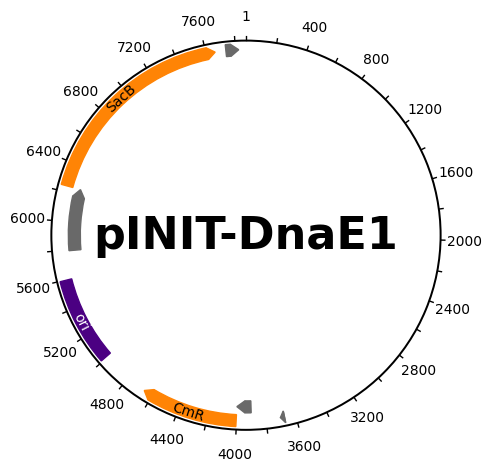

(<PolarAxes: >, <Figure size 500x500 with 1 Axes>)

In [18]:
# Create a Plots object and check the input vector

# Create the Plot object
plot_instance = Plot(mutation_instance=mutation_instance,
                     eblocks_design_instance=design_instance,
                     vector_instance=vector_instance,
                     gene_instance=gene_instance,
                     output_dir=output_dir,
                     show=True)

# Check the input vector
plot_instance.plot_vector(figsize=(5, 5))

In [19]:
# TODO Add DnaE1 gene sequence to vector
# TODO What are the other things in the vector that do not have a name?

In our vector we can see that our vector contains the SacB gene, has an origin of replication and contains a CmR (chloramphenicol) resistance marker

In [20]:

# TODO Show eBlocks in vector as well
# TODO Add plasmid visaulization of eBlock features


# from Bio import SeqIO
# from Bio.Graphics import GenomeDiagram
# from Bio.SeqFeature import SeqFeature, FeatureLocation

# # Parse the plasmid sequence
# plasmid_seq_record = SeqIO.read("plasmid_sequence.fasta", "fasta")

# # Create a GenomeDiagram object
# gd_diagram = GenomeDiagram.Diagram("Plasmid Map")

# # Add the sequence track
# gd_track = gd_diagram.new_track(1, name="Plasmid")
# gd_feature_set = gd_track.new_set()

# # Add the plasmid sequence
# gd_feature_set.add_feature(SeqFeature(FeatureLocation(0, len(plasmid_seq_record))), color="black")

# # Parse the GFF3 file to extract features
# # Assuming you have a function parse_gff3() that returns feature information
# features = parse_gff3("plasmid_features.gff3")

# # Add the features to the plasmid map
# for feature in features:
#     start = feature.start
#     end = feature.end
#     name = feature.attributes["Name"]
#     gd_feature_set.add_feature(SeqFeature(FeatureLocation(start, end)), color="blue", label=True, label_position="middle", label_size=8, label_angle=0, label_strand=0, name=name)

# # Draw the plasmid map
# gd_diagram.draw(format="linear", pagesize=(15*len(plasmid_seq_record), 400), fragments=1)
# gd_diagram.write("plasmid_map.png", "png")


In [28]:
# Run the eBlocks design and print the results

design_instance.run_design_eblocks()

mutation_instance: <src.mutation.Mutation object at 0x0000017CB2044450>
vector_instance: <src.sequence.Vector object at 0x0000017CAB563F10>
gene_instance: <src.sequence.Gene object at 0x0000017CB3734550>
output_dir: 'tutorial_output'
settings_file: settings\eblock-settings.txt
cost_optimization: True
amount_optimization: True
eblock_colors: {0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728', 4: '#9467bd', 5: '#8c564b', 6: '#e377c2', 7: '#7f7f7f', 8: '#bcbd22', 9: '#17becf', 10: '#aec7e8', 11: '#ffbb78', 12: '#98df8a', 13: '#ff9896', 14: '#c5b0d5', 15: '#c49c94', 16: '#f7b6d2', 17: '#c7c7c7', 18: '#dbdb8d', 19: '#9edae5', 20: '#393b79', 21: '#ff7f0e', 22: '#2ca02c', 23: '#8c564b', 24: '#e377c2', 25: '#7f7f7f', 26: '#bcbd22', 27: '#17becf'}
clone_files: True
verbose: True
codon_usage: U00096
bp_price: 0.05
max_eblock_length: 1500
min_eblock_length: 300
min_overlap: 25
min_order: 24
wt_eblocks: []
eblocks: []
most_abundant_codons: {}
Calculating relative codon frequencies, based on t

In [ ]:
for i in design_instance.wt_eblocks:
    print(i.name, i.sequence)



In the process, for each mutation a different eBlock is created and a .gb file is made to easily view the clone in a sequence editor. 

In [ ]:
# Now that we have designed the eblocks, we can visualize them using the Plot class

plot_instance.plot_eblocks_mutations(figure_length=20,
                                     figure_width=5)

In [13]:
# TODO Describe the eblocks here, what you can see with each color etc

In [ ]:
# Each type of mutations (insertions, deletions, substitutions) is represented by a different color, you can see the legend below

plot_instance.plot_mutation_legend()

In [ ]:
# To see how many mutations can be made in each eBlock, we can plot a histogram

plot_instance.plot_histogram_mutations()

In [16]:
# TODO Do some explanation here

In [17]:
# TODO Save the eblocks to a file

In [ ]:
# TODO (At the end of tutorial) Remake the eBlocks but optimize for amount of eBlocks

design_instance = EblockDesign(mutation_instance=mutation_instance,
                               vector_instance=vector_instance,
                               gene_instance=gene_instance,
                               output_dir=output_dir,
                               verbose=False,
                               cost_optimization=False,
                               amount_optimization=True)

design_instance.run_design_eblocks()
plot_instance.plot_eblocks_mutations(figure_length=20,
                                     figure_width=5)

In [102]:
# Remove all files in the output directory
import os
import shutil

def remove_all_files_and_folders(directory):
    # Check if the directory exists
    if os.path.exists(directory):
        shutil.rmtree(directory)  # Remove the entire directory and its contents
        os.makedirs(directory)      # Recreate the empty directory
    else:
        print(f"The directory {directory} does not exist.")

# Specify your directory here
remove_all_files_and_folders('tutorial_output')


In [ ]:
output_dir

In [ ]:
# Create a primer design object and run the primer design process for IVA primers to amplify the eblocks

settingsfile = 'settings/primer3-settings.txt'
seq_settingsfile = 'settings/primer3-seq-settings.txt'

primers_instance = DesignPrimers(mutation_instance=mutation_instance,
                                 eblocks_design_instance=design_instance,
                                 primers_settingsfile=settingsfile,
                                 seqprimers_settingsfile=seq_settingsfile,
                                 vector_instance=vector_instance,
                                 output_dir=output_dir)

primers_instance.run_design()

In this tutorial we will randomly design a number of mutations for the replicative DNA polymerase DnaE1 from *Mycobacterium smegmatis* to better understand it's function. <br>

The expression plasmid containing Msmeg DnaE1 is XXX and is stored in XXX. <br>

Gene from mycobrowser XXX and is stored in XXX <br>

Now we will randomly design some mutations for this gene. Here, we will not generate any mutations in the N- or C- terminal region, to ensure we can create a 20bp overlap with the beginning or end of the gene in our eBlock design <br>

1. **Single point mutations** <br>

Single point mutations contain a single mutation per eBlock

2. **Multiple point mutations in same eBlock**

Multiple point mutations contain multiple mutations in the same eBlock

3. **Inserts**

Inserts contain addition of amino acids in the eBlock

4. **Deletions**

Deletions have parts of the gene deleted